In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Renuka DJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### RFM Analysis:The Key to Understanding Customer Buying Behavior

RFM stands for Recency, Frequency and Monetary Value. It’s a proven database marketing technique that has traditionally been used by catalogers to increase conversion rates and reduce the expensive cost of mailing catalogs. Today, online retailers use RFM to increase conversion rates, personalization, relevancy and revenue. Sophisticated online shoppers demand personalized shopping experiences, and RFM Analysis is an excellent way to provide highly relevant, personalized campaigns that reflect
the preferences of the customers they want to keep.

The goal of RFM Analysis is to segment customers based on buying behavior. To do this, we
need to understand the historical actions of individual customers for each RFM factor. We then
rank customers based on each individual RFM factor, and finally pull all the factors together to
create RFM segments for targeted marketing. Now let’s define each term in RFM:

Recency is the number of days since the customer’s last
purchase. Typically, its value is defined in days. For
example, if the customer’s order was 42 days ago, then
their Recency input is “42.”

Frequency is the number of orders placed in a given time
period. If a customer has placed seven orders over the
course of one year, then their Frequency input is “7.”

Monetary Value is the total amount of money spent by the customer over a given time period.
If a customer has made 5 orders of 50 USD each over the course of one year, their Monetary Value
input for the year is 250 USD.

In [6]:
df=pd.read_excel('Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
print("We can observe that the invoice number is repeating. So the data seems o be organised at product level.")

We can observe that the invoice number is repeating. So the data seems o be organised at product level.


In [8]:
r,c=df.shape
print(f"The data has {r} rows and {c} columns.")

The data has 541909 rows and 8 columns.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
print("negative values might indicate return items. So we will remove all negative values for our analysis.")

negative values might indicate return items. So we will remove all negative values for our analysis.


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

In [20]:
#Creating a new column indicating total amount spent for each record.
df['Amount']=df['UnitPrice']*df['Quantity']

In [23]:
#to get total expense of each customer we group the dataframe by customer id and extract the aggregate amount spent by each customer over the duration of data collection.
monetory=df.groupby('CustomerID')['Amount'].agg('sum')

In [22]:
monetory

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Amount, Length: 4338, dtype: float64

In [24]:
#Frequency: count of purchase instances.
df2=df[['CustomerID','InvoiceNo']]

In [26]:
#During single purchase a customer can buy multiple items which will be recorded under same invoice number. So each invoice number indicates 1 purchase instance. Since there are repeating invoice numbers we will drop the duplicate values.
df2=df2.drop_duplicates()

In [29]:
#We will now get the count of invouces for each customer.
freq=df2.groupby('CustomerID')['InvoiceNo'].agg('count')

In [30]:
freq

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64

In [35]:
#To get the recency, we will take the last date for data collection as a reference. The difference from max_dt of invoicedate will be the recency.
max_dt=df['InvoiceDate'].max()
df['Recent']=max_dt-df['InvoiceDate']
df['Recent']

0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904     0 days 00:00:00
541905     0 days 00:00:00
541906     0 days 00:00:00
541907     0 days 00:00:00
541908     0 days 00:00:00
Name: Recent, Length: 530104, dtype: timedelta64[ns]

In [36]:
#To get the recency in desired format of days
df['Recent']=df['Recent'].apply(lambda x:x.days)
df['Recent']

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: Recent, Length: 530104, dtype: int64

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Recent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [45]:
#Recency: how recently customer made their last purchase. So lesser the number of days more recent was the purchase. so we extract minimum value for recent for each customer.
recency=df.groupby('CustomerID')['Recent'].agg('min')

In [46]:
#For customers who made the purchase on last day of data collection recency will show 0. So we add 1 to all the values.
recency=recency+1

In [47]:
recency

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: Recent, Length: 4338, dtype: int64

In [42]:
#We will now create a dataframe for 'Monetory','Frequency','Recency' data
rfm=pd.DataFrame(monetory).merge(pd.DataFrame(freq),on='CustomerID')

In [43]:
rfm=rfm.merge(recency,on='CustomerID')

In [48]:
rfm.columns=['Monetory','Frequency','Recency']

In [49]:
rfm.head()

,Monetory,Frequency,Recency
CustomerID,,,
12346.0,77183.60,1,326
12347.0,4310.00,7,2
12348.0,1797.24,4,75
12349.0,1757.55,1,19
12350.0,334.40,1,310


In [50]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetory   4338 non-null   float64
 1   Frequency  4338 non-null   int64  
 2   Recency    4338 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [57]:
rfm.describe()

,Monetory,Frequency,Recency
count,4338.000000,4338.000000,4338.000000
mean,2054.266460,4.272015,92.536422
std,8989.230441,7.697998,100.014169
min,3.750000,1.000000,1.000000
25%,307.415000,1.000000,18.000000
50%,674.485000,2.000000,51.000000
75%,1661.740000,5.000000,142.000000
max,280206.020000,209.000000,374.000000


In [58]:
print('We observe from the statistical description that the data is highly right skewed.')

We observe from the statistical description that the data is highly right skewed.


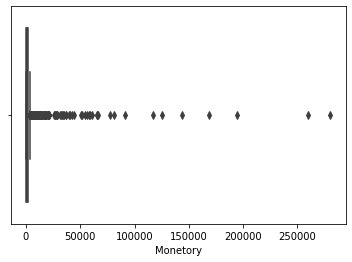

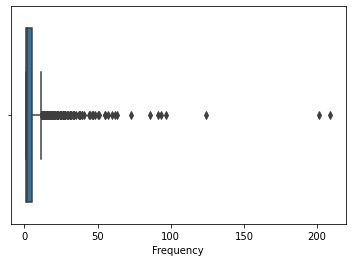

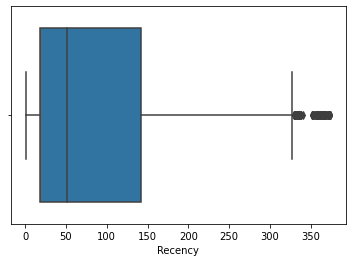

In [51]:
for i in rfm.columns:
    sns.boxplot(rfm[i])
    plt.show()

In [54]:
#Outlier treatment
q1=rfm.quantile(0.25)
q3=rfm.quantile(0.75)
iqr=q3-q1


ub=q3+1.5*iqr
lb=q1-1.5*iqr

dff=rfm[~((rfm<lb)|(rfm>ub)).any(axis=1)]


In [55]:
dff

,Monetory,Frequency,Recency
CustomerID,,,
12348.0,1797.24,4,75
12349.0,1757.55,1,19
12350.0,334.40,1,310
12352.0,2506.04,8,36
12353.0,89.00,1,204
...,...,...,...
18278.0,173.90,1,74
18280.0,180.60,1,278
18281.0,80.82,1,181


In [56]:
dff.describe()

,Monetory,Frequency,Recency
count,3710.000000,3710.000000,3710.000000
mean,887.351400,2.836119,90.148248
std,813.511284,2.193053,88.908883
min,3.750000,1.000000,1.000000
25%,296.475000,1.000000,22.000000
50%,602.940000,2.000000,56.000000
75%,1244.770000,4.000000,139.000000
max,3692.280000,11.000000,327.000000


In [59]:
print("The skewness is significantly reduced after outlier treatment.")

The skewness is significantly reduced after outlier treatment.


In [60]:
#Scaling data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
rfm_sc=sc.fit_transform(dff)


In [64]:
#Kmeans Clustering on rfm data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans=KMeans()

ssd=[]; sscore=[]

for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_sc)
    ssd.append(kmeans.inertia_)
    sscore.append(silhouette_score(rfm_sc,kmeans.labels_))

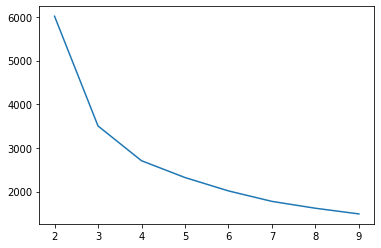

In [66]:
#Visualizing elbow formed by sum of squared distance values
plt.plot(range(2,10),ssd)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

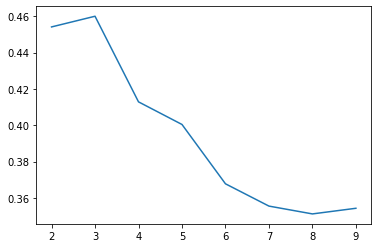

In [67]:
#Visualising the silhouette score
plt.plot(range(2,10),sscore)
plt.plot

In [68]:
print("Since we have an elbow at 3 and 4; and silhouette score is highest at 3 we will go ahead with a 3 clusters solution.")

Since we have an elbow at 3 and 4; and silhouette score is highest at 3 we will go ahead with a 3 clusters solution.


In [69]:
#Kmeans clustering with n_neighbours as obtained above
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(rfm_sc)

KMeans(n_clusters=3, random_state=42)

In [74]:
#Adding the clustering information to original rfm dataframe
dff['Cluster']=kmeans.predict(rfm_sc)

C:\Users\Renuka DJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
dff.head()

,Monetory,Frequency,Recency,Cluster
CustomerID,,,,
12348.0,1797.24,4,75,2
12349.0,1757.55,1,19,0
12350.0,334.40,1,310,1
12352.0,2506.04,8,36,2
12353.0,89.00,1,204,1


0    1969
1     920
2     821
Name: Cluster, dtype: int64


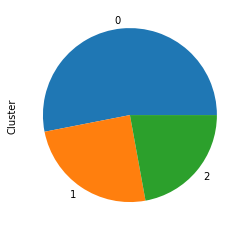

In [89]:
#Checking number of records for each cluster
print(dff['Cluster'].value_counts())
dff['Cluster'].value_counts().plot(kind='pie')
plt.show()

In [86]:
print("Cluster 0 comprises of more that half of the data followed by cluster 1 and 2 respectively.")

Cluster 0 comprises of more that half of the data followed by cluster 1 and 2 respectively.


In [77]:
#Average characteristics of customers in each cluster
dff.groupby('Cluster').agg('mean')

,Monetory,Frequency,Recency
Cluster,,,
0,599.217046,2.120874,48.814119
1,414.094598,1.498913,226.802174
2,2108.706822,6.049939,36.147381


In [91]:
print("Cluster 2 comprises of customer with highest expenditure on an average 2018.71 unit currency, highest average frequency of 6 times and lowest average recency of 36 days.\n\nThis means they spend a lot, are frequent purchasers and have made purchase very recently. These seem to be the loyal customers and retaining them through highest quality of products and services is most beneficial to the company.")

Cluster 2 comprises of customer with highest expenditure on an average 2018.71 unit currency, highest average frequency of 6 times and lowest average recency of 36 days.

This means they spend a lot, are frequent purchasers and have made purchase very recently. These seem to be the loyal customers and retaining them through highest quality of products and services is most beneficial to the company.


In [92]:
print("Cluster 0 comprises of customer with average expenditure of 599 unit currency, average frequency of 2 times and average recency of 49 days. This means the spending pattern is frugal, however they keep coming back and have made recent purchase.\n\nThese customers are low on spending however they appreciate the products and services. The frequency can be boosted through promotional offers, membership programs etc. ")

Cluster 0 comprises of customer with average expenditure of 599 unit currency, average frequency of 2 times and average recency of 49 days. This means the spending pattern is frugal, however they keep coming back and have made recent purchase.

These customers are low on spending however they appreciate the products and services. The frequency can be boosted through promotional offers, membership programs etc. 


In [93]:
print("Cluster 1 customers have the lowest average expenditure. On an average they have purchased just 1-2 times and the average recency is highest i.e 226 days. This is more than 6 months.\n\nCompany need to understand the experience of these customers and reasons for their low engagement. This understanding can be used to improve engagement of such customers which form a considerable population of the data.")

Cluster 1 customers have the lowest average expenditure. On an average they have purchased just 1-2 times and the average recency is highest i.e 226 days. This is more than 6 months.

Company need to understand the experience of these customers and reasons for their low engagement. This understanding can be used to improve engagement of such customers which form a considerable population of the data.
